### Explore Weather Trends (Los Angeles, CA & Global):
1. Create a `line chart` that compares your `city’s temperatures` with the `global temperatures` and `plot` the `moving average` rather than the yearly averages in order to `smooth out` the lines, making trends more observable 
2. Make `observations` about the similarities and `differences` between the `world averages` and your `city’s averages`, as well as `overall trends`. 

_a: "Is your city hotter or cooler on average compared to the global average? Has the difference been consistent over time?"_  Los Angeles temperatures were hotter on average compared to global average and this has been consistent over the entire dataset.
<br>
<br>
_b. “How do the changes in your city’s temperatures over time compare to the changes in the global average?”_ The `mean()` of both Pandas Series for local and global temperatures was `8` so the difference in Celsius temperature averaged about an `8` degree difference between them. While the variance taken on the average temperatures within each dataset varied `32%` for local data and `34%` for global data. So changes within each dataset was very similar and mean shows almost a 10 degree difference between average temperatures.
<br>
<br>
_c. "What does the overall trend look like? Is the world getting hotter or cooler? Has the trend been consistent over the last few hundred years?"_ Looking at the results from deriving a slope of both datasets, city trend was `0.005113830043010149` while global trend was `0.004733619080561259` which shows Los Angeles, CA is trending a bit higher than global temperatures. This has been consistent over the few hundred years from viewing the steadily increasing line in the line chart. 

In [77]:
import pandas as pd
import numpy as np

import matplotlib
from matplotlib import style, figure
from IPython.display import HTML
 
city_data = pd.read_csv('city_data.csv')
global_data = pd.read_csv('global_data.csv')

In [78]:
global_data.drop(global_data.head(99).index,inplace=True) # drop last n rows
global_data.drop(global_data.tail(2).index,inplace=True) # drop last n rows
global_data.shape

(165, 2)

In [79]:
city_data.shape

(165, 2)

In [80]:
def slope(data, order=1): # cite 
    coeffs = np.polyfit(data.index.values, list(data), order)
    slope = coeffs[-2]
    return float(slope)

slope_city = slope(city_data['avg_temp'])
slope_global = slope(global_data['avg_temp'])

print('city trend: ', slope_city, 'global trend: ', slope_global)

# cite: https://stackoverflow.com/questions/42920537/finding-increasing-trend-in-pandas

city trend:  0.005113830043010149 global trend:  0.008314695589453166


In [81]:
city_data.var()

year        2282.500000
avg_temp       0.323481
dtype: float64

In [82]:
global_data.var()

year        2282.500000
avg_temp       0.211752
dtype: float64

In [83]:
city_year = city_data['year']
global_year = global_data['year']
city_temp = city_data['avg_temp']
global_temp = global_data['avg_temp']

print('city: ', city_year.tail(), 'global: ', global_year.tail())

city:  160    2009
161    2010
162    2011
163    2012
164    2013
Name: year, dtype: int64 global:  259    2009
260    2010
261    2011
262    2012
263    2013
Name: year, dtype: int64


In [84]:
a = global_data['avg_temp']
b = city_data['avg_temp']
diff = b.sub(a)
print("the mean taken for both city and global datasets was: ", round(diff.mean(skipna = True)))

the mean taken for both city and global datasets was:  8


In [85]:
print('city: ', city_temp.tail(), 'global: ', global_temp.tail())

city:  160    16.68
161    15.89
162    15.87
163    17.09
164    18.12
Name: avg_temp, dtype: float64 global:  259    9.51
260    9.70
261    9.52
262    9.51
263    9.61
Name: avg_temp, dtype: float64


In [86]:
city_temp, global_temp

(0      15.71
 1      15.28
 2      15.53
 3      15.61
 4      16.27
 5      15.74
 6      15.94
 7      15.52
 8      16.19
 9      15.67
 10     15.29
 11     15.41
 12     16.51
 13     16.05
 14     15.88
 15     16.62
 16     15.89
 17     16.33
 18     16.51
 19     16.09
 20     16.05
 21     15.64
 22     15.89
 23     15.66
 24     15.70
 25     15.33
 26     16.19
 27     15.70
 28     16.24
 29     15.44
        ...  
 135    16.76
 136    15.96
 137    16.50
 138    16.09
 139    16.44
 140    16.36
 141    16.37
 142    16.00
 143    16.79
 144    16.36
 145    16.29
 146    16.64
 147    17.08
 148    16.93
 149    15.37
 150    16.12
 151    16.64
 152    16.47
 153    16.43
 154    16.94
 155    16.55
 156    16.43
 157    16.62
 158    16.70
 159    17.01
 160    16.68
 161    15.89
 162    15.87
 163    17.09
 164    18.12
 Name: avg_temp, Length: 165, dtype: float64, 99     7.98
 100    7.90
 101    8.18
 102    8.10
 103    8.04
 104    8.21
 105    8.11
 106    8.

<Figure size 1080x720 with 0 Axes>

Text(0.5, 0, 'year')

Text(0, 0.5, 'average temperature C°')

Text(0.5, 1.0, 'exploring global & local (los angeles, ca) weather trends')

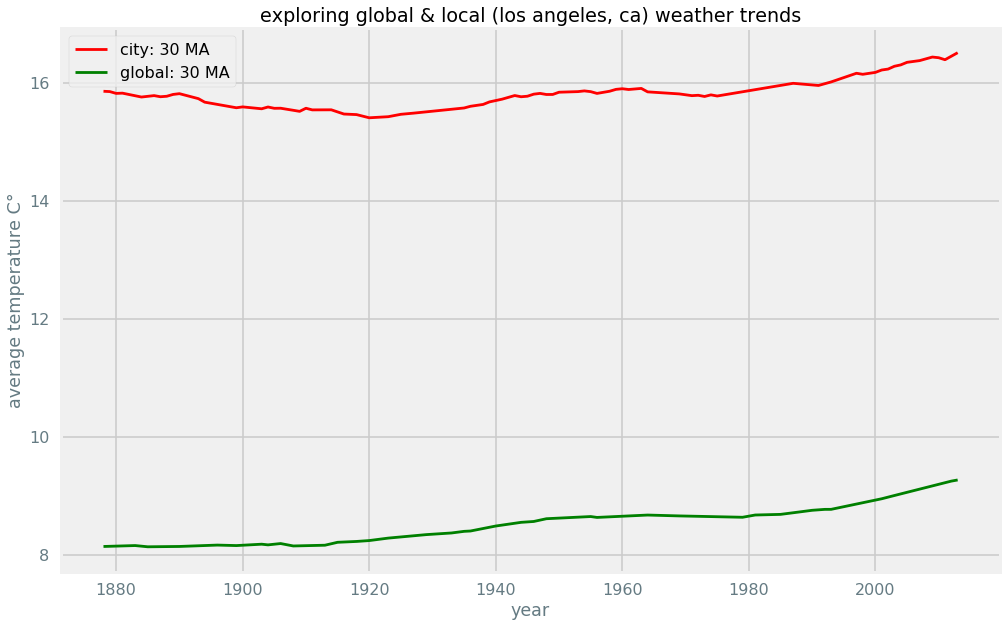

In [91]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 17})

plt.figure(figsize=(15,10))

plt.plot(city_year, city_temp.rolling(window=30).mean(), 'r-', label='city: 30 MA')
plt.plot(global_year, global_temp.rolling(window=30).mean(), 'g-', label='global: 30 MA')
plt.legend(loc='best')

plt.xlabel('year')
plt.ylabel('average temperature C°')
plt.title('exploring global & local (los angeles, ca) weather trends')

style.use('seaborn-poster')
plt.show()

In [88]:
#cite: https://towardsdatascience.com/implementing-moving-averages-in-python-1ad28e636f9d